In [1]:
import requests
import requests.exceptions
import pprint
import pandas as pd
import time
import datetime
import json 
from sqlalchemy import create_engine
import pymysql

def jprint(obj):
    # create a formatted string and dict of the Python JSON object 
    text = json.dumps(obj, sort_keys=True, indent=4)
    dict = json.loads(text)
    return dict
def get_api_response(url, response_type): #create function to make api request
    headers = {
        'X-RapidAPI-Host': "https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi" 
    }
    
    response = requests.get(url, headers=headers)
    
    if response_type == 'json':
        print(json.dumps(response.json(), indent=4))
        return response.json()
    elif response_type == 'dataframe':
        json_data = response.json()
        df = pd.DataFrame(json_data)
        return df
    else:
        return None


username = 'OliviaJYang'
password = 'springds2024'
host = '127.0.0.1'
port = '3306'  
database_name = 'rentaldb'

#create SQLAlchemy engine object to connect to database
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database_name}") 


api_url = "https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi"

i=0
while i<60:
    json_string = get_api_response(api_url, 'json')

    data = pd.json_normalize(json_string) #create flat dataframe from json data
    
    if i==0:
        #add to new table
        data.to_sql('api_data', con=engine, if_exists='replace', index=False)
    else:
        #append to table
        try:
            data.to_sql('api_data', con=engine, if_exists='append', index=False)
        except Exception as e:
            print("Error occurred while inserting unique locality data into the 'api_data' table:", e)

    time.sleep(59)
    i+= 1
    

{
    "factor": 27000,
    "pi": 3.1415556165527665,
    "time": "2024-05-08 22:30:28"
}
{
    "factor": 29791,
    "pi": 3.1416262207744947,
    "time": "2024-05-08 22:31:28"
}
{
    "factor": 32768,
    "pi": 3.1415621360116797,
    "time": "2024-05-08 22:32:28"
}
{
    "factor": 35937,
    "pi": 3.1416204800638963,
    "time": "2024-05-08 22:33:28"
}
{
    "factor": 39304,
    "pi": 3.141567210886769,
    "time": "2024-05-08 22:34:28"
}
{
    "factor": 42875,
    "pi": 3.1416159772049452,
    "time": "2024-05-08 22:35:28"
}
{
    "factor": 46656,
    "pi": 3.1415712201192867,
    "time": "2024-05-08 22:36:28"
}
{
    "factor": 50653,
    "pi": 3.141612395757074,
    "time": "2024-05-08 22:37:28"
}
{
    "factor": 54872,
    "pi": 3.1415744293588412,
    "time": "2024-05-08 22:38:28"
}
{
    "factor": 59319,
    "pi": 3.141609511594793,
    "time": "2024-05-08 22:39:27"
}
{
    "factor": 64000,
    "pi": 3.141577028589768,
    "time": "2024-05-08 22:40:27"
}
{
    "factor": 68921,
  

In [6]:
query = "SELECT * FROM api_data" #create sql query that gets columns from property table
api_df = pd.read_sql(query, con=engine)
api_df.head()

,factor,pi,time
0,27000,3.141556,2024-05-08 22:30:28
1,29791,3.141626,2024-05-08 22:31:28
2,32768,3.141562,2024-05-08 22:32:28
3,35937,3.141620,2024-05-08 22:33:28
4,39304,3.141567,2024-05-08 22:34:28


In [7]:
api_df.tail()

,factor,pi,time
55,15625,3.141657,2024-05-08 23:25:25
56,17576,3.141536,2024-05-08 23:26:25
57,19683,3.141643,2024-05-08 23:27:25
58,21952,3.141547,2024-05-08 23:28:25
59,24389,3.141634,2024-05-08 23:29:25


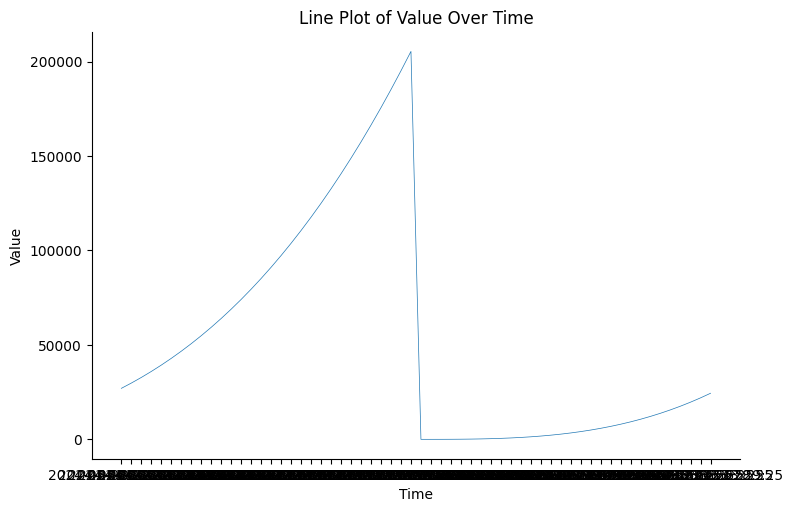

In [3]:
import seaborn as sns

sns.relplot(x='time', y='factor', kind='line', 
            data=api_df, aspect=1.6, linewidth=.5).set(xlabel = 'Time',
                                                              ylabel = 'Value',
                                                              title = 'Line Plot of Value Over Time')

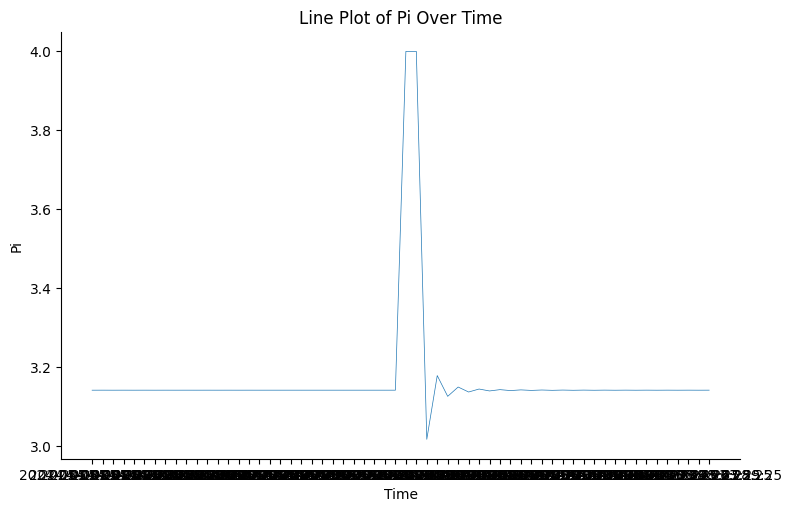

In [4]:
sns.relplot(x='time', y='pi', kind='line', 
            data=api_df, aspect=1.6, linewidth=.5).set(xlabel = 'Time',
                                                              ylabel = 'Pi',
                                                              title = 'Line Plot of Pi Over Time')